<font size = 6>Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys 
import os

sys.path.append("C:\\Program Files\\Lumerical\\v202\\api\\python\\") #Default windows lumapi path
#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi

sys.path.append(os.path.dirname('C:\\Users\\andre\\Documents\\GitHub\\Photonics\\Ring Resonator')) #Current directory
#sys.path.append(os.path.dirname('/home/trainner/Documents/Andre/GitHub/Photonics'))

<font size = 6>Parameters

In [2]:
pi = np.pi

<font size = 6> Effective phase shift

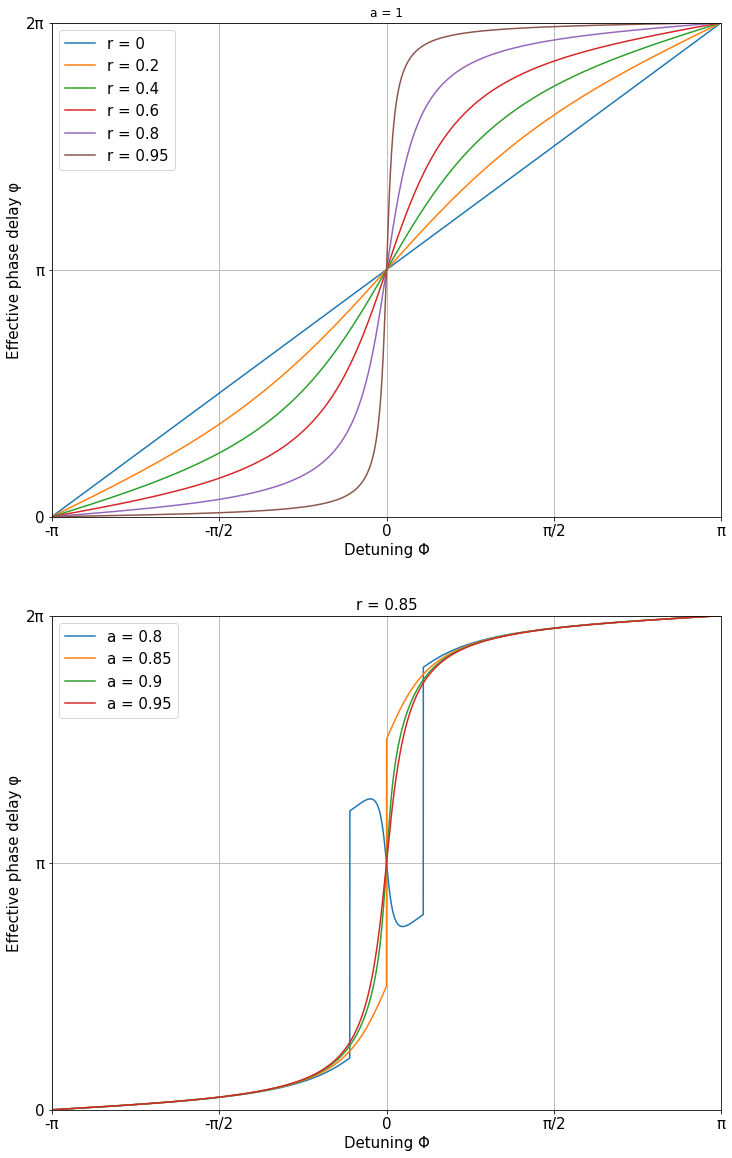

In [3]:
af = 1
rf = 0.85
r = [0, 0.2, 0.4, 0.6, 0.8, 0.95]
a = [0.8, 0.85, 0.9, 0.95]

figure1, ax0 = plt.subplots(2,1,figsize = (12,20))
phi = np.linspace(-pi, pi, 100000)

for i in range (len(r)):
    epsaf = pi + phi + np.arctan((r[i]*np.sin(phi))/(af - r[i]*np.cos(phi))) + np.arctan((r[i]*af*np.sin(phi))/(1 - r[i]*af*np.cos(phi)))
    ax0[0].plot(phi, epsaf, label = 'r = {}'.format(r[i]))

ax0[0].set_title('a = 1')
ax0[0].set_xlabel('Detuning Φ', fontsize = 15)
ax0[0].set_ylabel('Effective phase delay φ', fontsize = 15)
ax0[0].set_xlim(-pi, pi)
ax0[0].set_ylim(0, 2*pi)
ax0[0].set_xticks([-pi, -0.5*pi, 0, 0.5*pi, pi], ['-π', '-π/2', '0', 'π/2', 'π'], fontsize = 15)
ax0[0].set_yticks([0, pi, 2*pi], ['0', 'π', '2π'], fontsize = 15)
ax0[0].legend(fontsize = 15)
ax0[0].grid(True)

for i in range (len(a)):
    epsrf = pi + phi + np.arctan((rf*np.sin(phi))/(a[i] - rf*np.cos(phi))) + np.arctan((rf*a[i]*np.sin(phi))/(1 - rf*a[i]*np.cos(phi)))
    ax0[1].plot(phi, epsrf, label = 'a = {}'.format(a[i]))

ax0[1].set_title('r = 0.85', fontsize = 15)
ax0[1].set_xlabel('Detuning Φ', fontsize = 15)
ax0[1].set_ylabel('Effective phase delay φ', fontsize = 15)
ax0[1].set_xlim(-pi, pi)
ax0[1].set_ylim(0, 2*pi)
ax0[1].set_xticks([-pi, -0.5*pi, 0, 0.5*pi, pi], ['-π', '-π/2', '0', 'π/2', 'π'], fontsize = 15)
ax0[1].set_yticks([0, pi, 2*pi], ['0', 'π', '2π'], fontsize = 15)
ax0[1].legend(fontsize = 15)
ax0[1].grid(True)

plt.savefig('Imagens/Tutorial/Effective Phase Shift.png')

<font size = 6>Transmission

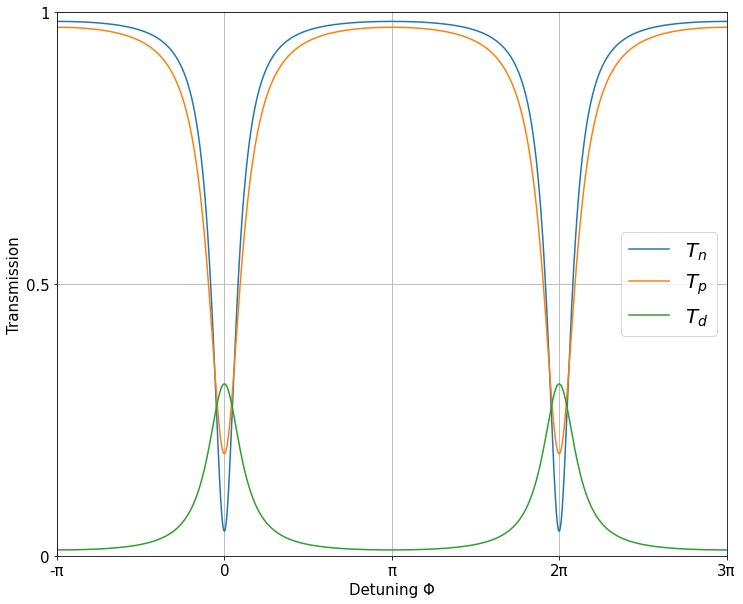

In [4]:
a = 0.85
r = 0.9
r1 = 0.9
r2 = 0.9

phi = np.linspace(-pi, 3*pi, 100000)

Tn = (a**2 - 2*r*a*np.cos(phi) + r**2)/(1 - 2*a*r*np.cos(phi) + (r*a)**2)
Tp = (r2**2*a**2 - 2*r1*r2*a*np.cos(phi) + r1**2)/(1 - 2*r1*r2*a*np.cos(phi) + (r1*r2*a)**2)
Td = ((1 - r1**2)*(1 - r2**2)*a)/(1 - 2*r1*r2*a*np.cos(phi) + (r1*r2*a)**2)

plt.figure(figsize = (12,10))
plt.plot(phi, Tn, label = '$T_n$')
plt.plot(phi, Tp, label = '$T_p$')
plt.plot(phi, Td, label = '$T_d$')
plt.xlabel('Detuning Φ', fontsize = 15)
plt.ylabel('Transmission', fontsize = 15)
plt.xlim(-pi, 3*pi)
plt.ylim(0, 1)
plt.xticks([-pi, 0, pi, 2*pi, 3*pi], ['-π', '0', 'π', '2π', '3π'], fontsize = 15)
plt.yticks([0, 0.5, 1], ['0', '0.5', '1'], fontsize = 15)
plt.legend(fontsize = 20)
plt.grid(True)

plt.savefig('Imagens/Tutorial/Transmission.png')